# Double-q learning
An example

In [1]:
import agents
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
map_states = {
    "A": 0,
    "B": 1,
}

map_actions = {
    "left": 0,
    "right": 1,
}

In [78]:
n_arms_B = 10
rewards = np.random.normal(loc=-0.1, scale=1, size=n_arms_B)

In [79]:
@njit
def step(state, action):
    if state == 0:
        reward = 0
        if action == 1: # right
            new_state = 0
        if action == 0: # left
            new_state = 1

    if state == 1:
        new_state = 0
        reward = rewards[action]

    return new_state, reward

@njit
def q_step(state, Q, epsilon, alpha, gamma):
    action = agents.choose_action(state, Q, epsilon)
    new_state, reward = step(state, action)
    q_new = Q[state][action] + alpha * (reward + gamma * Q[state].max() - Q[state][action])
    return (new_state, action), q_new

In [80]:
Qv = (
    np.zeros(2,),
    np.zeros(n_arms_B,)
)

epsilon = 0.1
state = 1
agents.choose_action(state, Qv, epsilon)

9

In [81]:
alpha = 0.5
gamma = 1.0

n_steps = 1000

state = 0

n_steps_A = 0
n_steps_left_from_A = 0

prop_steps = []

for n in range(n_steps):
    (state_new, action), Q_update = q_step(state, Qv, epsilon, alpha, gamma)

    if state == 0:
        n_steps_A += 1
        if action == 1:
            n_steps_left_from_A += 1
            prop_steps.append(n_steps_left_from_A / n_steps_A)
    
    Qv[state][action] = Q_update
    state = state_new

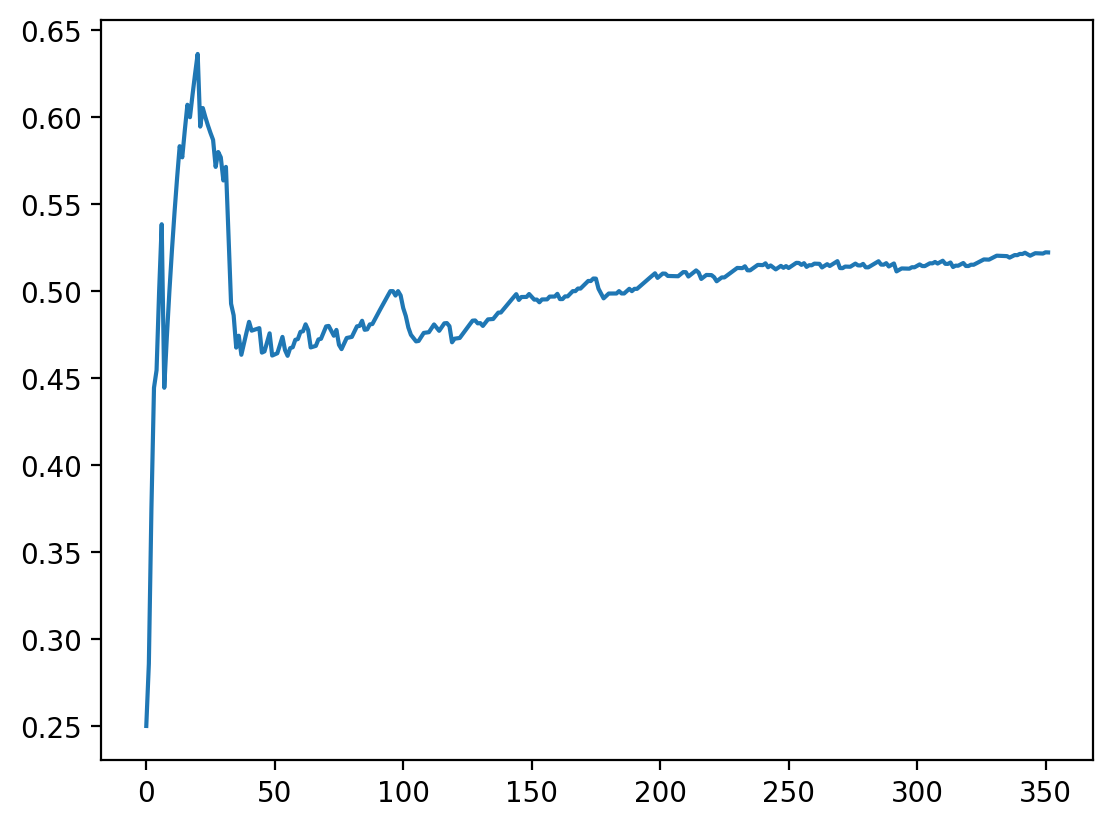

In [82]:
plt.plot(prop_steps)